# Keras 패키지를 사용한 신경망 구현

## Keras Modules

* Model
 * Sequentials = neural network
 * Graph


* Layers 
 * Dense = fully connected regular neural network
 * Dropout
 * Activations


* Activations
 * sigmoid
 * tanh
 * relu
 * softmax
* Initializer
 * normal 
 * uniform




* Regularizer 
 * l1
 * l2
 * l1l2
* Loss
 * mean_squared_error
 * categorical_crossentropy
* Optimizer
 * SGD

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255.0
Y_train = np_utils.to_categorical(y_train, 10)

Using Theano backend.


15302656/15296311 [==============================] - 13s    


In [6]:
import time
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(30, input_dim=784, activation="sigmoid", init='normal'))   #30은 인풋과 히든 가기 위한 다음 단계. 
model1.add(Dense(10, activation="sigmoid", init='normal'))
model1.compile(loss='mse', optimizer=SGD(), metrics=["accuracy"])

hist1 = model1.fit(X_train, Y_train, nb_epoch=10, batch_size=10)
time.sleep(0.1)

Epoch 1/10
 1010/60000 [..............................] - ETA: 134s - loss: 0.2280 - acc: 0.1119

ValueError: I/O operation on closed file

In [7]:
hist1.history['loss']

NameError: name 'hist1' is not defined

In [8]:
model2 = Sequential()
model2.add(Dense(30, input_dim=784, activation="tanh"))
model2.add(Dense(10, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=["accuracy"])

hist2 = model2.fit(X_train, Y_train, nb_epoch=10, batch_size=10)
time.sleep(0.1)

Epoch 1/10
 4710/60000 [=>............................] - ETA: 63s - loss: 1.2323 - acc: 0.6892

ValueError: I/O operation on closed file

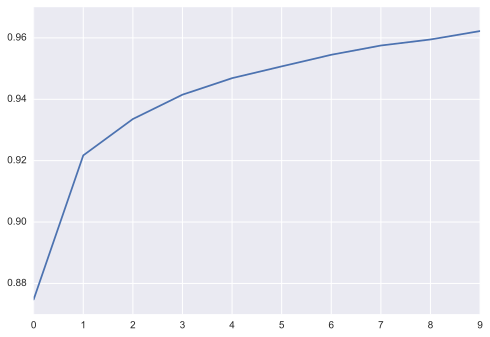

In [19]:
plt.plot(hist2.history["acc"])
plt.show()

In [17]:
model3 = Sequential()
model3.add(Dense(30, input_dim=784, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

%time hist3 = model3.fit(X_train, Y_train, nb_epoch=10, batch_size=10, verbose=0)

CPU times: user 43.5 s, sys: 0 ns, total: 43.5 s
Wall time: 43.5 s


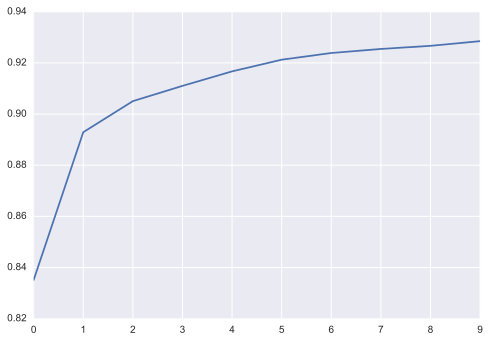

In [18]:
plt.plot(hist3.history["acc"])
plt.show()